# Importing Libraries/Reading in Data

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data/Prem-Tomorrowland_posts_11-16.csv')
df.head()

,title,selftext,subreddit,created_utc
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849
2,Hand crafts 2021,NaN,Tomorrowland,1636935255
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669
4,Was Tomorrowland around the world 2020 a speci...,NaN,Tomorrowland,1636904090


In [3]:
df.shape

(2000, 4)

---

# Cleaning/Preprocessing/EDA

### Cleaning/Combining Text/Creating Post Length

In [4]:
df.isnull().sum()

title            0
selftext       885
subreddit        0
created_utc      0
dtype: int64

In [98]:
df['selftext'].fillna('', inplace=True)  
# fill with a blank string. Almost even split between nulls for each subreddit (already checked in title and selftext notebook)

In [6]:
df['post_text'] = df['title'] + ' ' + df['selftext']

In [7]:
length = []
for i in df['post_text']:
    length.append(len(i))
    
df['post_length'] = length

In [8]:
num_words = []
for i in df['post_text']:
    num_words.append(len(i.split()))

df['post_word_count'] = num_words

In [9]:
df.head()

,title,selftext,subreddit,created_utc,post_text,post_length,post_word_count
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,"Genreverse Hi everyone, \n\nHere at Genreverse...",409,58
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,Tomorrowland and it's bass line-up So obviousl...,655,109
2,Hand crafts 2021,,Tomorrowland,1636935255,Hand crafts 2021,17,3
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669,Winter TML lodging hello! I have the 4 day pas...,353,68
4,Was Tomorrowland around the world 2020 a speci...,,Tomorrowland,1636904090,Was Tomorrowland around the world 2020 a speci...,61,9


In [10]:
df.groupby('subreddit').mean()[['post_length', 'post_word_count']]

,post_length,post_word_count
subreddit,,
PremierLeague,244.275,39.092
Tomorrowland,245.422,41.666


**Tomorrowland posts are slightly longer on average than Premier League posts but not by much.**

In [11]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['post_text'])
post_cvec = cvec.transform(df['post_text'])

In [12]:
post_words = pd.DataFrame(post_cvec.todense(), columns=cvec.get_feature_names())
post_words

,00,000,001,005,005056aa7581,007,00a,00s,01,02,...,čolak,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
post_words['which_sub'] = df['subreddit']

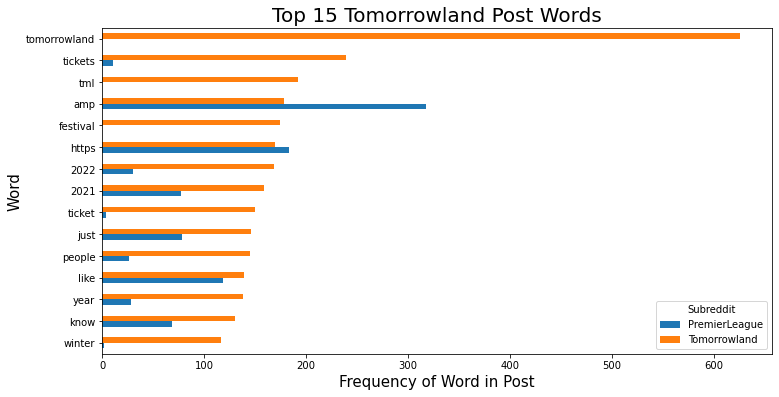

In [14]:
ax = post_words.groupby('which_sub').sum().T.sort_values('Tomorrowland', ascending=False).head(15).sort_values('Tomorrowland').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 Tomorrowland Post Words', size=20)
plt.xlabel('Frequency of Word in Post', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15tomo_selftext_words.png', bbox_inches='tight');
plt.show();

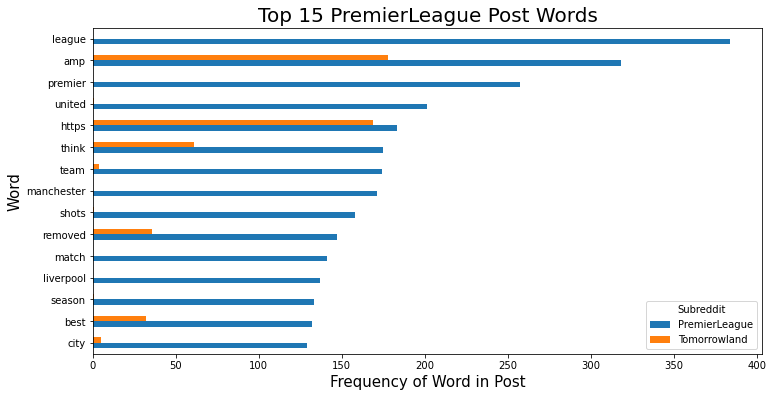

In [15]:
ax = post_words.groupby('which_sub').sum().T.sort_values('PremierLeague', ascending=False).head(15).sort_values('PremierLeague').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 PremierLeague Post Words', size=20)
plt.xlabel('Frequency of Word in Post', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15prem_selftext_words.png', bbox_inches='tight');
plt.show();

In [16]:
posts_and_words = pd.merge(df, post_words, on=df.index)
posts_and_words.drop(columns='key_0', inplace=True)

In [17]:
posts_and_words.head(2)

,title_x,selftext,subreddit_x,created_utc,post_text,post_length,post_word_count,00,000,001,...,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮,which_sub
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,"Genreverse Hi everyone, \n\nHere at Genreverse...",409,58,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,Tomorrowland and it's bass line-up So obviousl...,655,109,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland


In [18]:
prem_post_words = posts_and_words[posts_and_words['subreddit_x'] == 'PremierLeague'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'post_length', 'post_word_count',
                                                                                                    'which_sub', 'post_text'])
top15prem_post_words = prem_post_words.sum().sort_values(ascending=False).head(15)
top15prem_post_words

league        384
amp           318
premier       257
united        201
https         183
think         175
team          174
manchester    171
shots         158
removed       147
match         141
liverpool     137
season        133
best          132
city          129
dtype: int64

<BarContainer object of 15 artists>

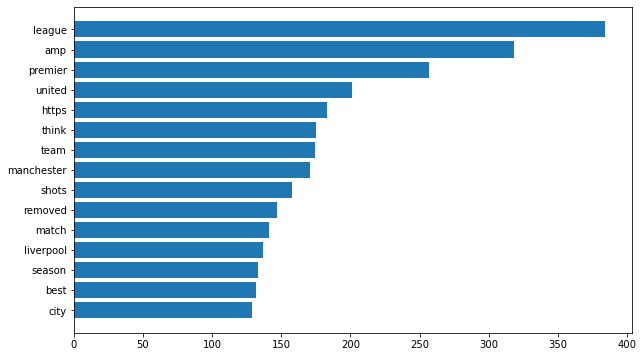

In [19]:
plt.figure(figsize=(10,6))
plt.barh(y=top15prem_post_words.sort_values().index, width=top15prem_post_words.sort_values())

In [20]:
tomo_post_words = posts_and_words[posts_and_words['subreddit_x'] == 'Tomorrowland'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'post_length', 'post_word_count', 
                                                                                                   'which_sub', 'post_text'])
top15tomo_post_words = tomo_post_words.sum().sort_values(ascending=False).head(15)
top15tomo_post_words

tomorrowland    626
tickets         239
tml             192
amp             178
festival        174
https           169
2022            168
2021            159
ticket          150
just            146
people          145
like            139
year            138
know            130
winter          116
dtype: int64

<BarContainer object of 15 artists>

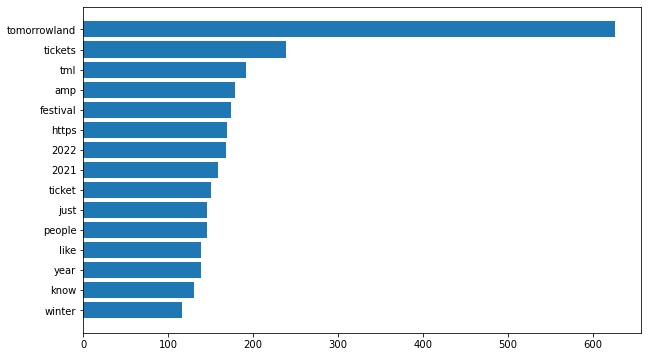

In [21]:
plt.figure(figsize=(10,6))
plt.barh(y=top15tomo_post_words.sort_values().index, width=top15tomo_post_words.sort_values())

---

# Models

### Model Preparation

In [22]:
df['subreddit'] = df['subreddit'].map({'Tomorrowland': 0, 'PremierLeague': 1})

In [23]:
X = df['post_text']
y = df['subreddit']

In [24]:
y.value_counts(normalize=True)
# baseline accuracy of 50% if predicting subreddit is from Premier League subreddit <- looking to beat this

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

---

### Model 1 - KNN with CountVectorizer

In [26]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [27]:
params1 = {
    'cvec__min_df': [15, 16, 17],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'knn__weights': ['uniform', 'distance']
}

In [28]:
gs1 = GridSearchCV(pipe1, param_grid=params1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.836


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 16,
 'cvec__stop_words': 'english',
 'knn__weights': 'distance'}

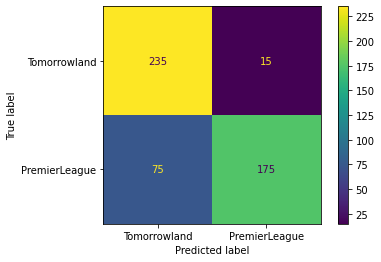

In [29]:
metrics.plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [30]:
preds1 = gs1.predict(X_test)
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(y_test, preds1).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [31]:
tn1 / (tn1 + fp1)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.94

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [32]:
tp1 / (tp1 + fn1)   # Model was not as good at predicting subreddit if post came from Premier League

0.7

In [33]:
preds1 = gs1.predict(X_test)
X_test[(y_test != preds1) & (preds1 == 0)].head(60)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1571                     Breakdown of annual squad wages 
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                             Proper baller. Deserved 
1919    Please subscribe to my channel Hello,my name's...
1641                                   Pretty much this! 
1228    A commanding performance or a open-ended thril...
1062    Anyone else fed up of 3pm games not being tele...
1290    Former wonder kids who failed to live up to th...
1317    Seems you lot appreciated the last one I poste...
1345                  This man deserves a lot of respect 
1028                         Best youngster in the prem. 
1748    Do you think Suarez would get away with this t...
1912    What do you think the Top 3 Will be in order b...
1991    If Liverpool play "Heavy Metal Football", what...
1883              Best cdm right now? I would say rodri. 
1050    A vide

In [34]:
X_test[(y_test != preds1) & (preds1 == 1)].head(15)

106    I have created great content for your children...
475    Global Journey Easy Tent: Swap weekends using ...
553                      SOCIAL MEDIA MANAGING [removed]
491    Tomorrowland 2021 attendance poll Hello all! S...
562             KUMBH MELA WITH WATER BROTHERS [removed]
21     In light of the Astroworld tragedy, can we ple...
98                    Treasure Case TML Winter [removed]
880          Info request // swapping weekends [removed]
776    Classic house Listen to JayyeSpen mix classics...
540    India’s COVID crisis ‘beyond heartbreaking’: W...
317                                     NeKKoN [removed]
840    Anyone happen to record Kolsch &amp; Joris Voo...
565    Earn Free Amazon Gift Cards &amp; Codes Legall...
64     Best treasure case \n\n[View Poll](https://www...
418    Can I stay the entire week at dreamville? So I...
Name: post_text, dtype: object

In [136]:
pred1_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs1.predict_proba(X_test)[:,1]})

pred1_df.head()

,true_values,pred_probs
1370,1,1.000000
654,0,0.000000
1778,1,0.193998
646,0,0.184699
1171,1,1.000000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


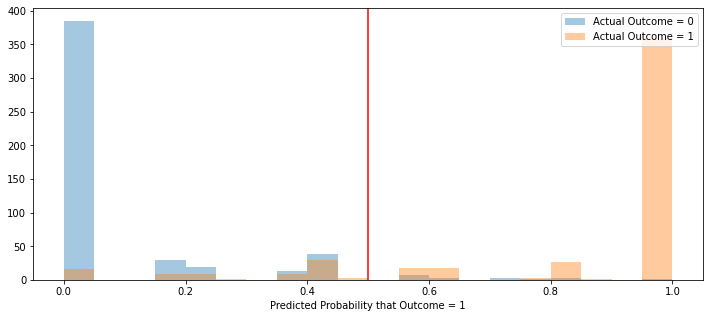

In [137]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred1_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

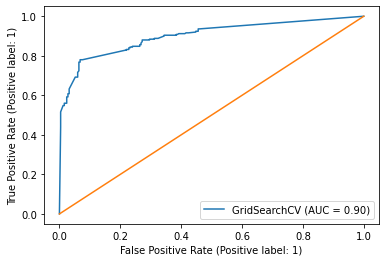

In [138]:
# ROC curve for Model 1
metrics.plot_roc_curve(gs1, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 2 - KNN with TFIDF

In [35]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [122]:
params2 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [22, 23, 24, 25, 26, 27],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__weights': ['uniform', 'distance']
}

In [123]:
gs2 = GridSearchCV(pipe2, param_grid=params2)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.8460000000000001


{'knn__weights': 'uniform',
 'tvec__max_df': 0.2,
 'tvec__min_df': 26,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

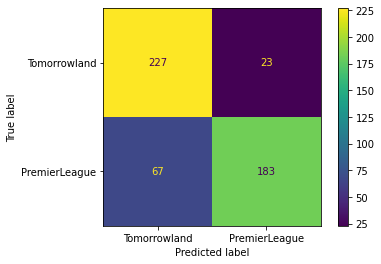

In [124]:
metrics.plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [125]:
preds2 = gs2.predict(X_test)
tn2, fp2, fn2, tp2 = metrics.confusion_matrix(y_test, preds2).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [126]:
tn2 / (tn2 + fp2)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.908

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [127]:
tp2 / (tp2 + fn2)   # Model was not as good at predicting subreddit if post came from Premier League

0.732

In [128]:
preds2 = gs2.predict(X_test)
X_test[(y_test != preds2) & (preds2 == 0)].head(60)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1571                     Breakdown of annual squad wages 
1167    Are there any PL manager who got sacked but re...
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                             Proper baller. Deserved 
1919    Please subscribe to my channel Hello,my name's...
1641                                   Pretty much this! 
1945    Why did Pogba get a red card against Liverpool...
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1574    Word is circulating that managers love it at S...
1724    Match, Team and Player of the weekend! Who was...
1290    Former wonder kids who failed to live up to th...
1317    Seems you lot appreciated the last one I poste...
1028                         Best youngster in the prem. 
1010    Premier Bets - Brand new Premier League system...
1748    Do you

In [129]:
X_test[(y_test != preds2) & (preds2 == 1)].head(23)

106    I have created great content for your children...
553                      SOCIAL MEDIA MANAGING [removed]
890    Is it possible to watch (share)the relive? I f...
491    Tomorrowland 2021 attendance poll Hello all! S...
562             KUMBH MELA WITH WATER BROTHERS [removed]
898    When does the relive platform go open? It's 10...
267    One of the best ways to watch: with Philips Hu...
269    Stream doesn't work Not only that I have to se...
21     In light of the Astroworld tragedy, can we ple...
856    NYE code giveaway I have a code for one lucky ...
288    Is there a URL to get the US stream/event from...
880          Info request // swapping weekends [removed]
461    Tomorrowland 2021 Am I the only one that waits...
540    India’s COVID crisis ‘beyond heartbreaking’: W...
742    Hey my lovely people!! This is a cover of Befo...
317                                     NeKKoN [removed]
840    Anyone happen to record Kolsch &amp; Joris Voo...
565    Earn Free Amazon Gift Ca

In [139]:
pred2_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs2.predict_proba(X_test)[:,1]})

pred2_df.head()

,true_values,pred_probs
1370,1,0.8
654,0,0.0
1778,1,0.4
646,0,0.4
1171,1,1.0


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


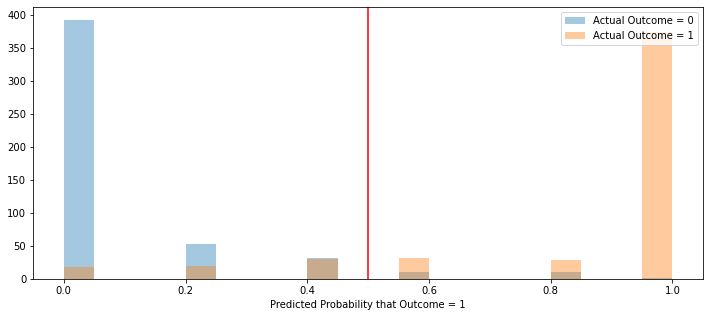

In [145]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred2_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

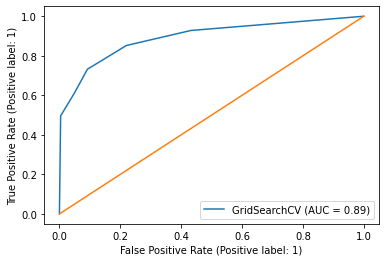

In [151]:
# ROC curve for Model 2
metrics.plot_roc_curve(gs2, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 3 - Logistic Regression with CountVectorizer

In [44]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [45]:
params3 = {
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [46]:
gs3 = GridSearchCV(pipe3, param_grid=params3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
gs3.best_params_

0.9293333333333333


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 2}

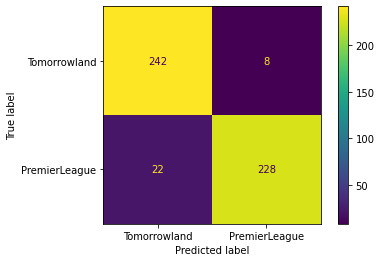

In [47]:
metrics.plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [48]:
preds3 = gs3.predict(X_test)
tn3, fp3, fn3, tp3 = metrics.confusion_matrix(y_test, preds3).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [49]:
tn3 / (tn3 + fp3)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.968

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [50]:
tp3 / (tp3 + fn3)   # Model was very good at predicting subreddit if post came from Premier League

0.912

In [51]:
preds3 = gs3.predict(X_test)
X_test[(y_test != preds3) & (preds3 == 0)].head(22)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                             Proper baller. Deserved 
1919    Please subscribe to my channel Hello,my name's...
1641                                   Pretty much this! 
1062    Anyone else fed up of 3pm games not being tele...
1290    Former wonder kids who failed to live up to th...
1317    Seems you lot appreciated the last one I poste...
1284    What was the year/reason you started supportin...
1626                                    Pure masterclass 
1668                       I made this on the glowforge. 
1377                                                Good 
1458    According to statistics from Artificial Intell...
1103    Interesting. Is it because Scholes played the ...
1131    Lukaku Cross Body Finish! PES 2021 Ultra Reali...
1401                      Anybody need a new goalkeeper? 
1348    guess 

In [52]:
X_test[(y_test != preds3) & (preds3 == 1)].head(8)

106    I have created great content for your children...
553                      SOCIAL MEDIA MANAGING [removed]
562             KUMBH MELA WITH WATER BROTHERS [removed]
805    The best time of my life deserves to be on my ...
880          Info request // swapping weekends [removed]
540    India’s COVID crisis ‘beyond heartbreaking’: W...
317                                     NeKKoN [removed]
64     Best treasure case \n\n[View Poll](https://www...
Name: post_text, dtype: object

In [140]:
pred3_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs3.predict_proba(X_test)[:,1]})

pred3_df.head()

,true_values,pred_probs
1370,1,0.974152
654,0,0.079616
1778,1,0.345504
646,0,0.180152
1171,1,0.976090


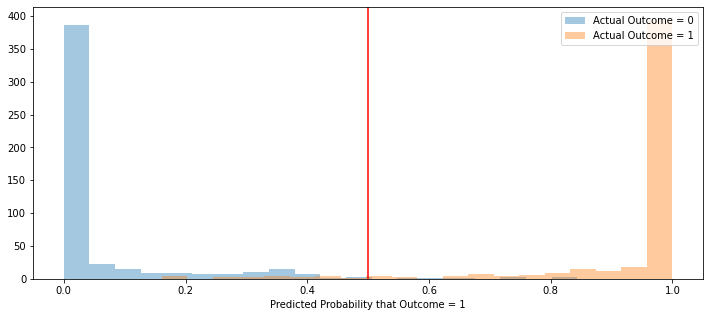

In [146]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred3_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

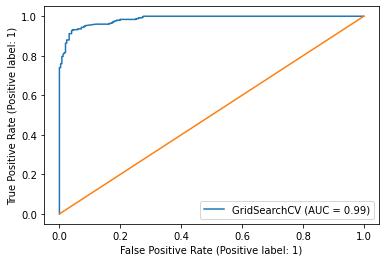

In [152]:
# ROC curve for Model 3
metrics.plot_roc_curve(gs3, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 4 - Logistic Regression with TFIDF

In [53]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [54]:
params4 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [55]:
gs4 = GridSearchCV(pipe4, param_grid=params4)
gs4.fit(X_train, y_train)
print(gs4.best_score_)
gs4.best_params_

0.9393333333333335


{'logreg__C': 3,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

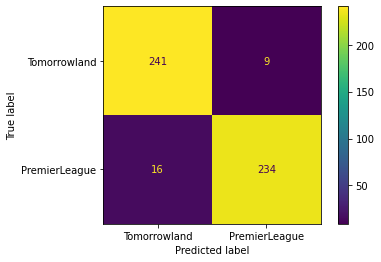

In [56]:
metrics.plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [57]:
preds4 = gs4.predict(X_test)
tn4, fp4, fn4, tp4 = metrics.confusion_matrix(y_test, preds4).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [58]:
tn4 / (tn4 + fp4)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.964

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [59]:
tp4 / (tp4 + fn4)   # Model was very good at predicting subreddit if post came from Premier League

0.936

In [60]:
preds4 = gs4.predict(X_test)
X_test[(y_test != preds4) & (preds4 == 0)].head(16)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1919    Please subscribe to my channel Hello,my name's...
1641                                   Pretty much this! 
1290    Former wonder kids who failed to live up to th...
1317    Seems you lot appreciated the last one I poste...
1626                                    Pure masterclass 
1816    Hey lads, I see that some of you have little c...
1668                       I made this on the glowforge. 
1458    According to statistics from Artificial Intell...
1131    Lukaku Cross Body Finish! PES 2021 Ultra Reali...
1401                      Anybody need a new goalkeeper? 
1348    guess the hammers are for real. I would like m...
1663                                                   😳 
1362    Operation Exercise: What's the coded message b...
Name: post_text, dtype: object

In [61]:
X_test[(y_test != preds4) & (preds4 == 1)].head(9)

566                                  NFTb Bot @nftb_bot 
106    I have created great content for your children...
553                      SOCIAL MEDIA MANAGING [removed]
562             KUMBH MELA WITH WATER BROTHERS [removed]
805    The best time of my life deserves to be on my ...
267    One of the best ways to watch: with Philips Hu...
540    India’s COVID crisis ‘beyond heartbreaking’: W...
317                                     NeKKoN [removed]
64     Best treasure case \n\n[View Poll](https://www...
Name: post_text, dtype: object

In [141]:
pred4_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs4.predict_proba(X_test)[:,1]})

pred4_df.head()

,true_values,pred_probs
1370,1,0.847092
654,0,0.197113
1778,1,0.393035
646,0,0.260692
1171,1,0.940326


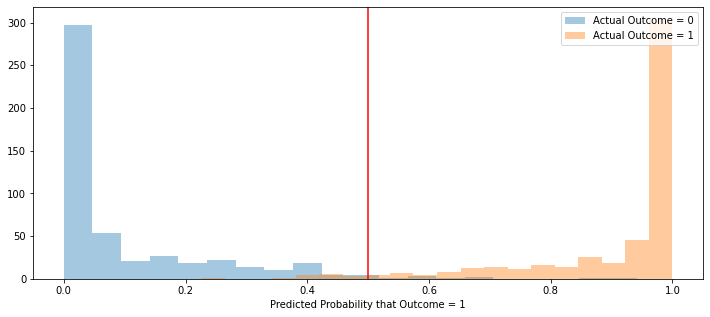

In [147]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred4_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

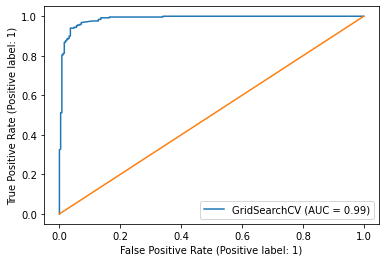

In [153]:
# ROC curve for Model 4
metrics.plot_roc_curve(gs4, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 5 - Decision Tree with CountVectorizer

In [62]:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [63]:
params5 = {
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'dt__random_state': [10],
    'dt__min_samples_split': [3, 4, 5, 6]
}

In [64]:
gs5 = GridSearchCV(pipe5, param_grid=params5)
gs5.fit(X_train, y_train)
print(gs5.best_score_)
gs5.best_params_

0.9033333333333333


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 1,
 'cvec__stop_words': 'english',
 'dt__min_samples_split': 5,
 'dt__random_state': 10}

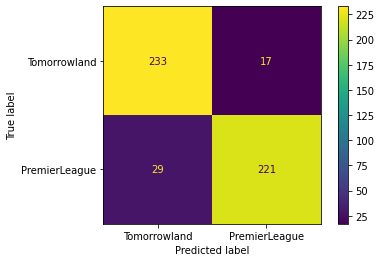

In [65]:
metrics.plot_confusion_matrix(gs5, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [66]:
preds5 = gs5.predict(X_test)
tn5, fp5, fn5, tp5 = metrics.confusion_matrix(y_test, preds5).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [67]:
tn5 / (tn5 + fp5)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.932

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [68]:
tp5 / (tp5 + fn5)   # Model was good at predicting subreddit if post came from Tomorrowland

0.884

In [69]:
preds5 = gs5.predict(X_test)
X_test[(y_test != preds5) & (preds5 == 0)].head(29)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1571                     Breakdown of annual squad wages 
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                             Proper baller. Deserved 
1641                                   Pretty much this! 
1574    Word is circulating that managers love it at S...
1317    Seems you lot appreciated the last one I poste...
1345                  This man deserves a lot of respect 
1028                         Best youngster in the prem. 
1883              Best cdm right now? I would say rodri. 
1536    'Bad, very bad indeed' - Italian media denounc...
1269         Who remembers this classic Redknapp moment? 
1626                                    Pure masterclass 
1669     Wolves fans,what's your opinion on Lage so far? 
1668                       I made this on the glowforge. 
1377                                                Good 
1458    Accord

In [70]:
X_test[(y_test != preds5) & (preds5 == 1)].head(17)

700    +++UPDATE+++ So, my mom painted me ODESZA's "A...
106    I have created great content for your children...
475    Global Journey Easy Tent: Swap weekends using ...
553                      SOCIAL MEDIA MANAGING [removed]
508    Miracle items? I thought this might be a good ...
890    Is it possible to watch (share)the relive? I f...
13     Refund question for non SEPA I'm finally getti...
562             KUMBH MELA WITH WATER BROTHERS [removed]
724    Decision 2021 postponed from 15 march to?? The...
385    How long will name change option last? In my a...
880          Info request // swapping weekends [removed]
632    Help with karma. Don’t use Reddit much but I h...
540    India’s COVID crisis ‘beyond heartbreaking’: W...
317                                     NeKKoN [removed]
64     Best treasure case \n\n[View Poll](https://www...
410    Workin' on my stage Name for 2024. Lmk what yo...
561    [OFFER] 20€ FOR YOU + 20€ FOR YOUR FRIEND! (MA...
Name: post_text, dtype: object

In [142]:
pred5_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs5.predict_proba(X_test)[:,1]})

pred5_df.head()

,true_values,pred_probs
1370,1,1.0
654,0,0.0
1778,1,0.0
646,0,0.0
1171,1,1.0


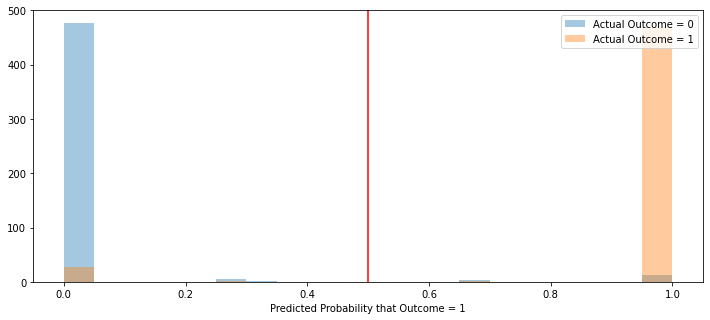

In [148]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred5_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

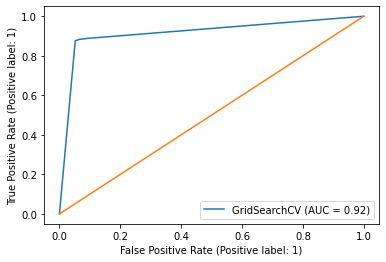

In [154]:
# ROC curve for Model 5
metrics.plot_roc_curve(gs5, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 6 - Decision Tree with TFIDF

In [71]:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [72]:
params6 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [1, 2, 3],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'dt__random_state': [42],
    'dt__min_samples_split': [2, 3]
}

In [73]:
gs6 = GridSearchCV(pipe6, param_grid=params6)
gs6.fit(X_train, y_train)
print(gs6.best_score_)
gs6.best_params_

0.8993333333333332


{'dt__min_samples_split': 2,
 'dt__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

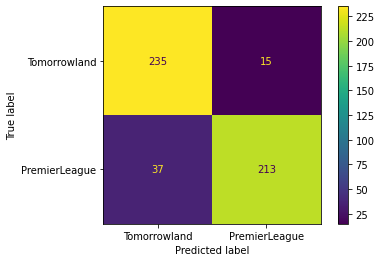

In [74]:
metrics.plot_confusion_matrix(gs6, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [75]:
preds6 = gs6.predict(X_test)
tn6, fp6, fn6, tp6 = metrics.confusion_matrix(y_test, preds6).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [76]:
tn6 / (tn6 + fp6)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.94

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [77]:
tp6 / (tp6 + fn6)   # Model was good at predicting subreddit if post came from Premier League

0.852

In [78]:
preds6 = gs6.predict(X_test)
X_test[(y_test != preds6) & (preds6 == 0)].head(37)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1571                     Breakdown of annual squad wages 
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                             Proper baller. Deserved 
1641                                   Pretty much this! 
1038    Are fan channels independent? I question wheth...
1459    Which are the most unexpected signings in rece...
1317    Seems you lot appreciated the last one I poste...
1028                         Best youngster in the prem. 
1284    What was the year/reason you started supportin...
1883              Best cdm right now? I would say rodri. 
1050    A video providing a surface level breakdown of...
1214    Can someone explain ffp? I keep hearing about ...
1326    Which Club would you say has the most talented...
1536    'Bad, very bad indeed' - Italian media denounc...
1269         Who remembers this classic Redknapp moment? 
1626          

In [79]:
X_test[(y_test != preds6) & (preds6 == 1)].head(15)

686    Let's gooooo!!!! Finally something to look for...
106    I have created great content for your children...
553                      SOCIAL MEDIA MANAGING [removed]
508    Miracle items? I thought this might be a good ...
890    Is it possible to watch (share)the relive? I f...
13     Refund question for non SEPA I'm finally getti...
562             KUMBH MELA WITH WATER BROTHERS [removed]
385    How long will name change option last? In my a...
58                         Does anyone know about this? 
880          Info request // swapping weekends [removed]
632    Help with karma. Don’t use Reddit much but I h...
709    Does anyone have the drink menu from 2019 summ...
540    India’s COVID crisis ‘beyond heartbreaking’: W...
64     Best treasure case \n\n[View Poll](https://www...
216    Musical Events of 8th August Greetings, Commun...
Name: post_text, dtype: object

In [143]:
pred6_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs6.predict_proba(X_test)[:,1]})

pred6_df.head()

,true_values,pred_probs
1370,1,1.0
654,0,0.0
1778,1,0.0
646,0,0.0
1171,1,1.0


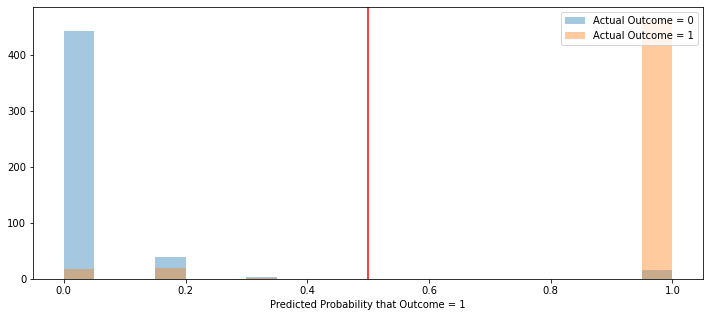

In [149]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred6_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

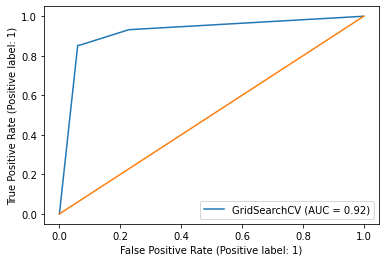

In [155]:
# ROC curve for Model 6
metrics.plot_roc_curve(gs6, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 7 - RandomForest with CountVectorizer

In [80]:
pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [81]:
params7 = {
    'cvec__min_df': [3, 4, 5],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'rf__random_state': [42]
}

In [82]:
gs7 = GridSearchCV(pipe7, param_grid=params7)
gs7.fit(X_train, y_train)
print(gs7.best_score_)
gs7.best_params_

0.9199999999999999


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 4,
 'cvec__stop_words': None,
 'rf__random_state': 42}

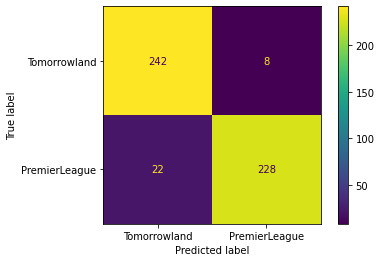

In [83]:
metrics.plot_confusion_matrix(gs7, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [84]:
preds7 = gs7.predict(X_test)
tn7, fp7, fn7, tp7 = metrics.confusion_matrix(y_test, preds7).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [85]:
tn7 / (tn7 + fp7)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.968

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [86]:
tp7 / (tp7 + fn7)   # Model was very good at predicting subreddit if post came from Premier League

0.912

In [87]:
preds7 = gs7.predict(X_test)
X_test[(y_test != preds7) & (preds7 == 0)].head(22)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1571                     Breakdown of annual squad wages 
1295                             Proper baller. Deserved 
1641                                   Pretty much this! 
1062    Anyone else fed up of 3pm games not being tele...
1317    Seems you lot appreciated the last one I poste...
1028                         Best youngster in the prem. 
1536    'Bad, very bad indeed' - Italian media denounc...
1626                                    Pure masterclass 
1668                       I made this on the glowforge. 
1910    What are you unpopular opinions? I’ll go first...
1377                                                Good 
1458    According to statistics from Artificial Intell...
1260    The so called “big 6” anyone else think this a...
1103    Interesting. Is it because Scholes played the ...
1131    Lukaku Cross Body Finish! PES 2021 Ultra Reali...
1401          

In [88]:
X_test[(y_test != preds7) & (preds7 == 1)].head(8)

106    I have created great content for your children...
553                      SOCIAL MEDIA MANAGING [removed]
562             KUMBH MELA WITH WATER BROTHERS [removed]
880          Info request // swapping weekends [removed]
540    India’s COVID crisis ‘beyond heartbreaking’: W...
317                                     NeKKoN [removed]
64     Best treasure case \n\n[View Poll](https://www...
624    Most memorable speech? So Tomorrowlans is famo...
Name: post_text, dtype: object

In [144]:
pred7_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs7.predict_proba(X_test)[:,1]})

pred7_df.head()

,true_values,pred_probs
1370,1,0.760000
654,0,0.170000
1778,1,0.390295
646,0,0.359026
1171,1,1.000000


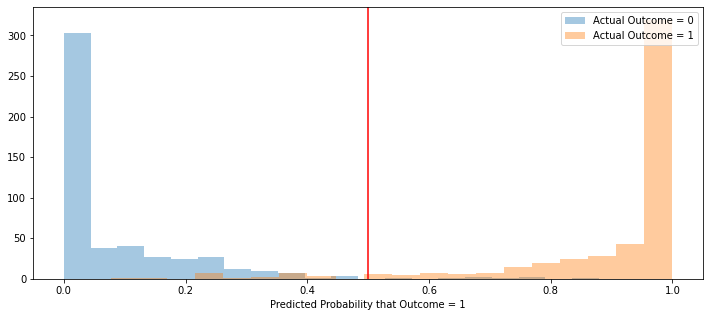

In [150]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred7_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

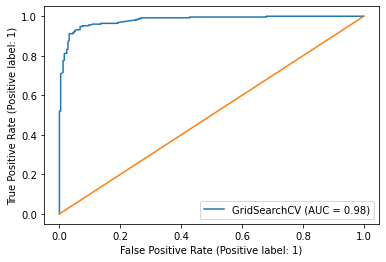

In [156]:
# ROC curve for Model 7
metrics.plot_roc_curve(gs7, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 8 - RandomForest with TFIDF

In [89]:
pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [90]:
params8 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__random_state': [42]
}

In [91]:
gs8 = GridSearchCV(pipe8, param_grid=params8)
gs8.fit(X_train, y_train)
print(gs8.best_score_)
gs8.best_params_

0.9226666666666666


{'rf__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

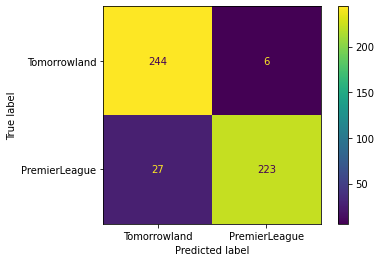

In [92]:
metrics.plot_confusion_matrix(gs8, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [93]:
preds8 = gs8.predict(X_test)
tn8, fp8, fn8, tp8 = metrics.confusion_matrix(y_test, preds8).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland posts?**

In [94]:
tn8 / (tn8 + fp8)   # Model was very good at predicting subreddit if post came from Tomorrowland

0.976

**Sensitivity - How good did the model perform at predicting Premier League posts?**

In [95]:
tp8 / (tp8 + fn8)   # Model was good at predicting subreddit if post came from Premier League

0.892

In [96]:
preds8 = gs8.predict(X_test)
X_test[(y_test != preds8) & (preds8 == 0)].head(27)

1778    Someone explain this to me Why did Evans only ...
1605                    Online Career Mode - FIFA 22 XB1 
1571                     Breakdown of annual squad wages 
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                             Proper baller. Deserved 
1641                                   Pretty much this! 
1062    Anyone else fed up of 3pm games not being tele...
1290    Former wonder kids who failed to live up to th...
1317    Seems you lot appreciated the last one I poste...
1028                         Best youngster in the prem. 
1536    'Bad, very bad indeed' - Italian media denounc...
1269         Who remembers this classic Redknapp moment? 
1626                                    Pure masterclass 
1668                       I made this on the glowforge. 
1910    What are you unpopular opinions? I’ll go first...
1843                                  Transfers [removed]
1377                                                Good 
1458    Accord

In [97]:
X_test[(y_test != preds8) & (preds8 == 1)].head(6)

106    I have created great content for your children...
553                      SOCIAL MEDIA MANAGING [removed]
880          Info request // swapping weekends [removed]
540    India’s COVID crisis ‘beyond heartbreaking’: W...
64     Best treasure case \n\n[View Poll](https://www...
624    Most memorable speech? So Tomorrowlans is famo...
Name: post_text, dtype: object

In [133]:
pred8_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs8.predict_proba(X_test)[:,1]})

pred8_df.head()

,true_values,pred_probs
1370,1,0.910000
654,0,0.320000
1778,1,0.294857
646,0,0.136384
1171,1,1.000000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


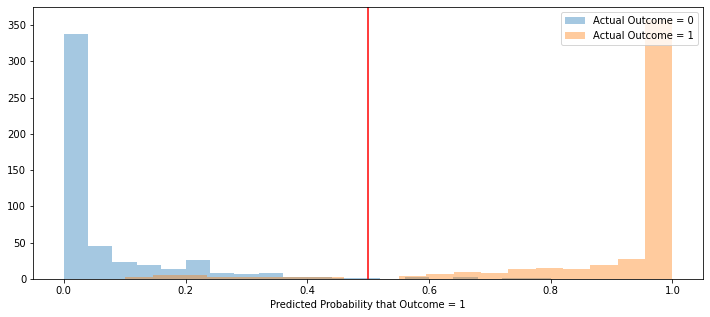

In [134]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred8_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

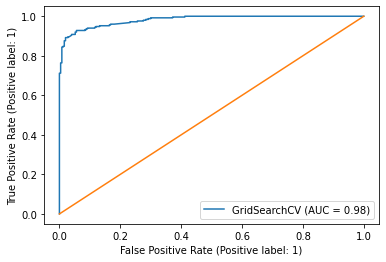

In [135]:
# ROC curve for Model 8
metrics.plot_roc_curve(gs8, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

# Analysis

### EDA 

*The post length and word count for both Premier League and Tomorrowland posts were fairly similar

---

### Model Analysis

*In reviewing the posts of incorrect predictions, the models seemed to incorrectly predict Premier League when the selftext had been removed from the subreddit.*